In [22]:
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomCrop, RandomHorizontalFlip, Normalize
import torchvision.transforms as T

In [2]:
transforms = Compose([
    RandomCrop((32, 32), padding= 4),
    RandomHorizontalFlip(p= 0.5),
    T.ToTensor(),
    Normalize(mean= (0.4914, 0.4822, 0.4465), std= (0.247, 0.243, 0.261))
])

train_data = CIFAR10(root= './', train= True, transform= transforms, download= True)
test_data = CIFAR10(root= './', train= False, transform= transforms, download= True)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import torch
import torch.nn as nn
from torch.utils.data.dataloader import DataLoader
from torch.optim.adam import Adam
from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import Compose
from torchvision.transforms import RandomCrop, RandomHorizontalFlip, Normalize
import torchvision.transforms as T

In [4]:
transforms = Compose([
    RandomCrop((32, 32), padding= 4),
    RandomHorizontalFlip(p= 0.5),
    T.ToTensor(),
    Normalize(mean= (0.4914, 0.4822, 0.4465), std= (0.247, 0.243, 0.261))
])

train_data = CIFAR10(root='./', train= True, download= True, transform= transforms)
test_data = CIFAR10(root='./', train= False, download= True, transform= transforms)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
train_loader = DataLoader(train_data, batch_size= 32, shuffle= True)
test_loader = DataLoader(test_data, batch_size= 32, shuffle= False)

In [6]:
img_data = iter(train_loader)
images, labels = next(img_data)

images.shape

torch.Size([32, 3, 32, 32])

In [7]:
img_data = images[7]

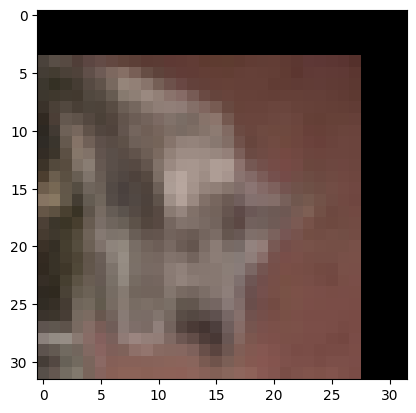

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def denomalize(img, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return img * std + mean

def View_img(image):
    mean= (0.4914, 0.4822, 0.4465) 
    std= (0.247, 0.243, 0.261)

    img_data = denomalize(image, mean, std)
    # img_data = image            # 자료형이 tensor이기 때문에
    img_data = img_data.numpy()     # 자료형을 전달하기 위해서는 numpy로 바꿔줘야 한다.
    plt.imshow(np.transpose(img_data,(1, 2, 0)))
    plt.show()


View_img(images[11])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9894737..2.08245].


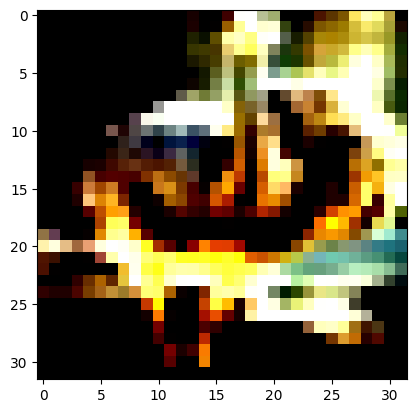

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(np.transpose(img_data,(1, 2, 0)))
plt.show()

In [10]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size= 3, padding= 1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size= 3, padding= 1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size= 2, stride= 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        return x
    
class Vgg16(nn.Module):
    def __init__(self, num_classes):
        super(Vgg16, self).__init__()

        self.block1 = BasicBlock(in_channels= 3, out_channels= 32, hidden_dim= 16)      # 32 -> 16. output : 16
        self.block2 = BasicBlock(in_channels= 32, out_channels= 128, hidden_dim= 64)    # 16 -> 8. output : 8
        self.block3 = BasicBlock(in_channels= 128, out_channels= 256, hidden_dim= 128)  # 8 -> 4. output : 4
        # 256 * 4 * 4

        self.fc1 = nn.Linear(in_features= 256 * 4 * 4, out_features= 2048)      # out_features는 임의로 지정하나 2의 승수로 작성하는 게 좋다
        self.fc2 = nn.Linear(in_features= 2048, out_features= 256)
        self.fc3 = nn.Linear(in_features= 256, out_features= num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)

        x = torch.flatten(x, start_dim= 1)      # metrix를 1차원으로 펴는 작업. 기존은 view와 reshape을 사용했음.
        # x = x.view(-1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x

model = Vgg16(10)
model


Vgg16(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=25

In [12]:
from torch.utils.tensorboard import SummaryWriter
import tqdm

writer = SummaryWriter()
lr = 1e-3
optim = Adam(model.parameters(), lr= lr)
criterion = nn.CrossEntropyLoss()
epochs = 20

device = 'cuda' if torch.cuda.is_available else 'cpu'
model.to(device)

step = 0

for epoch in range(epochs):
    for data, label in tqdm.tqdm(train_loader):
        optim.zero_grad()

        preds = model(data.to(device))
        loss = criterion(preds, label.to(device))

        loss.backward()
        optim.step()

        writer.add_scalar('loss/train', loss.item(), step)
        step += 1

    print(f'{epoch} loss: {loss.item()}')

100%|██████████| 1563/1563 [00:21<00:00, 72.10it/s]


0 loss: 1.381282091140747


100%|██████████| 1563/1563 [00:21<00:00, 72.86it/s]


1 loss: 1.024013876914978


100%|██████████| 1563/1563 [00:21<00:00, 72.34it/s]


2 loss: 0.8664824962615967


100%|██████████| 1563/1563 [00:21<00:00, 73.45it/s]


3 loss: 1.3474814891815186


100%|██████████| 1563/1563 [00:21<00:00, 73.46it/s]


4 loss: 0.7432946562767029


100%|██████████| 1563/1563 [00:21<00:00, 73.39it/s]


5 loss: 0.2926747500896454


100%|██████████| 1563/1563 [00:21<00:00, 73.18it/s]


6 loss: 1.1786987781524658


100%|██████████| 1563/1563 [00:21<00:00, 73.46it/s]


7 loss: 0.8500628471374512


100%|██████████| 1563/1563 [00:21<00:00, 73.48it/s]


8 loss: 0.6326632499694824


100%|██████████| 1563/1563 [00:21<00:00, 73.73it/s]


9 loss: 0.6074284911155701


100%|██████████| 1563/1563 [00:21<00:00, 73.56it/s]


10 loss: 1.1609265804290771


100%|██████████| 1563/1563 [00:21<00:00, 73.41it/s]


11 loss: 0.4921343922615051


100%|██████████| 1563/1563 [00:21<00:00, 73.27it/s]


12 loss: 0.6583554148674011


100%|██████████| 1563/1563 [00:21<00:00, 73.94it/s]


13 loss: 0.40783628821372986


100%|██████████| 1563/1563 [00:21<00:00, 73.90it/s]


14 loss: 0.38849905133247375


100%|██████████| 1563/1563 [00:21<00:00, 73.86it/s]


15 loss: 0.586898684501648


100%|██████████| 1563/1563 [00:22<00:00, 69.96it/s]


16 loss: 0.4870626926422119


100%|██████████| 1563/1563 [00:21<00:00, 71.51it/s]


17 loss: 0.392496258020401


100%|██████████| 1563/1563 [00:21<00:00, 71.82it/s]


18 loss: 0.7449518442153931


100%|██████████| 1563/1563 [00:21<00:00, 71.33it/s]

19 loss: 0.2416778951883316


In [13]:
model.eval()

with torch.no_grad():
    total_corr = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        preds = model(images)
        _, pred = torch.max(preds.data, 1)
        total_corr += (pred == labels).sum().item()

    print(f'정확도: {total_corr/len(test_data.targets)}')

정확도: 0.7978


In [14]:
from torchvision.models.vgg import vgg19

model = vgg19(pretrained= True)
model

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\82104/.cache\torch\hub\checkpoints\vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:09<00:00, 60.2MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [15]:
fc = nn.Sequential(
    nn.Linear(25088, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(4096, 10)
)

model.classifier = fc
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [16]:
train_loader = DataLoader(train_data, batch_size= 32, shuffle= True) 
test_loader = DataLoader(test_data, batch_size= 32, shuffle= False)

In [17]:
img_data = iter(train_loader)
images, labels = next(img_data)
images.shape

torch.Size([32, 3, 32, 32])

In [18]:
img_data = images[7]

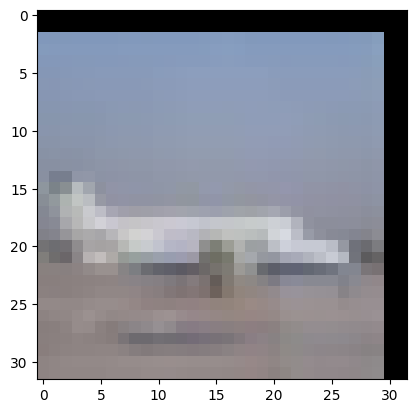

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def denomalize(img, mean, std):
    mean = torch.tensor(mean).view(3, 1, 1)
    std = torch.tensor(std).view(3, 1, 1)
    return img * std + mean

def View_img(image):
    mean = (0.4914, 0.4822, 0.4465)
    std = (0.247, 0.243, 0.261)

    img_data = denomalize(image, mean, std)
    img_data = img_data.numpy()
    plt.imshow(np.transpose(img_data, (1, 2, 0)))
    plt.show()

View_img(images[0])

In [24]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, hidden_dim):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, hidden_dim, kernel_size=3, padding= 1)
        self.conv2 = nn.Conv2d(hidden_dim, out_channels, kernel_size=3, padding= 1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size= 2, stride= 2)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)

        return x
    
class Vgg16(nn.Module):
    def __init__(self, num_classes):
        super(Vgg16, self).__init__()

        self.block1 = BasicBlock(in_channels= 3, out_channels= 32, hidden_dim= 16)
        self.block2 = BasicBlock(in_channels= 32, out_channels= 128, hidden_dim= 64)
        self.block3 = BasicBlock(in_channels= 128, out_channels= 256, hidden_dim= 128)

        self.fc1 = nn.Linear(in_features= 4096, out_features= 2048)
        self.fc2 = nn.Linear(in_features= 2048, out_features= 256)
        self.fc3 = nn.Linear(in_features= 256, out_features= num_classes)

        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = torch.flatten(x, start_dim= 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)

        return x
    
model = Vgg16(10)
model

Vgg16(
  (block1): BasicBlock(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): BasicBlock(
    (conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): BasicBlock(
    (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu): ReLU()
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=4096, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=25

In [27]:
from torch.utils.tensorboard import SummaryWriter
import tqdm

writer = SummaryWriter()
lr = 1e-3
optim = Adam(model.parameters(), lr= lr)
criterion = nn.CrossEntropyLoss()
epochs = 20

device = 'cuda' if torch.cuda.is_available else 'cpu'
model.to(device)

for epoch in range(epochs):
    for data, label in tqdm.tqdm(train_loader):
        optim.zero_grad()

        preds = model(data.to(device))
        loss = criterion(preds, label.to(device))

        loss.backward()
        optim.step()

        writer.add_scalar('Loss/train', loss.item(), step)
        step += 1

    print(f'{epoch} loss : {loss.item()}')

100%|██████████| 1563/1563 [00:21<00:00, 73.15it/s]


0 loss : 1.439165711402893


100%|██████████| 1563/1563 [00:21<00:00, 73.84it/s]


1 loss : 0.975395679473877


100%|██████████| 1563/1563 [00:21<00:00, 73.69it/s]


2 loss : 0.6914406418800354


100%|██████████| 1563/1563 [00:21<00:00, 73.47it/s]


3 loss : 1.237381100654602


100%|██████████| 1563/1563 [00:21<00:00, 74.39it/s]


4 loss : 0.63556307554245


100%|██████████| 1563/1563 [00:21<00:00, 74.06it/s]


5 loss : 1.2195801734924316


100%|██████████| 1563/1563 [00:22<00:00, 68.41it/s]


6 loss : 0.5974869728088379


100%|██████████| 1563/1563 [00:21<00:00, 72.10it/s]


7 loss : 0.5225017666816711


100%|██████████| 1563/1563 [00:22<00:00, 70.52it/s]


8 loss : 0.7923908829689026


100%|██████████| 1563/1563 [00:22<00:00, 70.39it/s]


9 loss : 0.38471630215644836


100%|██████████| 1563/1563 [00:22<00:00, 70.73it/s]


10 loss : 0.4581766426563263


100%|██████████| 1563/1563 [00:21<00:00, 73.32it/s]


11 loss : 0.5907542705535889


100%|██████████| 1563/1563 [00:21<00:00, 72.70it/s]


12 loss : 0.441405326128006


100%|██████████| 1563/1563 [00:21<00:00, 72.76it/s]


13 loss : 0.3731333017349243


100%|██████████| 1563/1563 [00:21<00:00, 71.11it/s]


14 loss : 0.15163613855838776


100%|██████████| 1563/1563 [00:22<00:00, 69.36it/s]


15 loss : 0.44257688522338867


100%|██████████| 1563/1563 [00:21<00:00, 71.05it/s]


16 loss : 0.9043160676956177


100%|██████████| 1563/1563 [00:22<00:00, 69.47it/s]


17 loss : 0.3234286904335022


100%|██████████| 1563/1563 [00:23<00:00, 67.03it/s]


18 loss : 1.1249691247940063


100%|██████████| 1563/1563 [00:24<00:00, 63.49it/s]

19 loss : 0.3150036633014679


In [28]:
from torchvision.models.vgg import vgg16

model = vgg16(pretrained= True)
model

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\82104/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:08<00:00, 61.6MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1